In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#arr = np.random.normal(2, 3, 1000) #DOES NOT FOLLOW BENFORD'S LAW
#arr = np.random.uniform(2, 3, 1000) #DOES NOT FOLLOW BENFORD'S LAW
#arr= np.random.randint(1, 1000, 1000) #DOES NOT FOLLOW BENFORD'S LAW
# arr = np.random.exponential(2, 1000) #FOLLOWS BENFORD'S LAW
# arr = np.random.lognormal(2, 3, 1000) #FOLLOWS BENFORD'S LAW
arr = np.random.poisson(2, 1000) #FOLLOWS BENFORD'S LAW


In [3]:
ndigits = 10
p_ndigits = np.log(1 + 1/np.arange(1, ndigits))/np.log(ndigits)
a = np.zeros(ndigits)
for i in arr:
    a[int(str(i).replace('0.', '').replace('-', '')[0])] += 1

a = [a[(i+1)%ndigits]/ndigits for i in range(ndigits)]

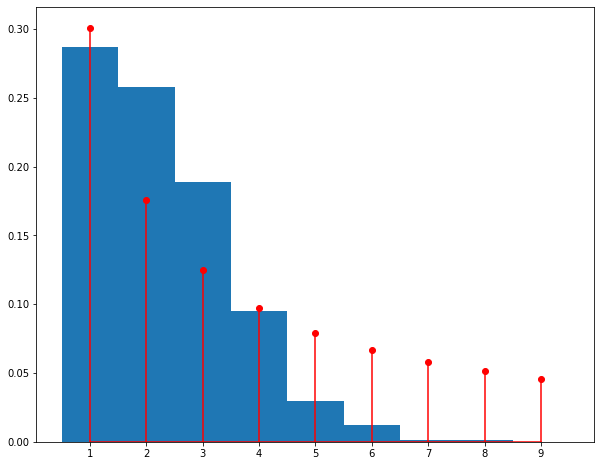

In [4]:
plt.figure(figsize=(10, 8))
plt.bar(range(1, ndigits), a[1:]/np.sum(a), width=1)
plt.stem(range(1, ndigits), p_ndigits, linefmt='r-', markerfmt='ro', basefmt='r-')
plt.xticks(range(1, ndigits))
plt.show()

In [5]:
a

array([127., 287., 258., 189.,  95.,  30.,  12.,   1.,   1.,   0.])

In [6]:
def benford_law_test(arr, ndigits=10):
    a = np.zeros(ndigits)
    for i in arr:
        a[int(str(i).replace('0.', '').replace('-', '')[0])] += 1

    return a[1:]/np.sum(a)

def ideal_benford_law(ndigits=10):
    return np.log(1 + 1/np.arange(1, ndigits))/np.log(ndigits)

In [12]:
all_a = []
for i in range(1000):
    arr = np.random.normal(2, 3, 1000)
    all_a.append(benford_law_test(arr)[1])
    #assert np.allclose(a, b, atol=0.05)

In [13]:
all_a = np.asarray(all_a)

(array([  6.,  48., 138., 237., 265., 186.,  88.,  24.,   6.,   2.]),
 array([0.158 , 0.1667, 0.1754, 0.1841, 0.1928, 0.2015, 0.2102, 0.2189,
        0.2276, 0.2363, 0.245 ]),
 <BarContainer object of 10 artists>)

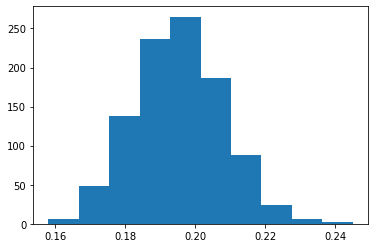

In [14]:
plt.hist(all_a, bins=10)